# Boston House Price Prediction Project

In [2]:
import numpy as np
import pandas as pd

import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pio.templates

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


#### Importing data and studying it

In [3]:
from sklearn.datasets import fetch_california_housing
dataset = fetch_california_housing()
print(dataset.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [4]:
X = dataset.data
Y = dataset.target

In [5]:
data = pd.DataFrame(dataset.data,columns=dataset.feature_names)
data['Value'] = pd.DataFrame(dataset.target)
data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Value
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [6]:
data.shape

(20640, 9)

In [7]:
data.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Value       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


#### Ploting 

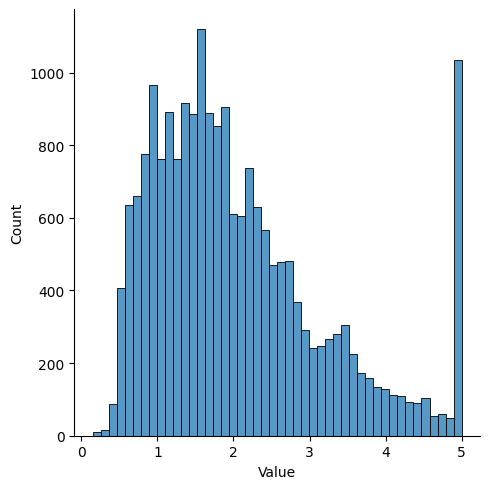

In [9]:
sns.displot(data['Value'])

Text(0, 0.5, 'Value')

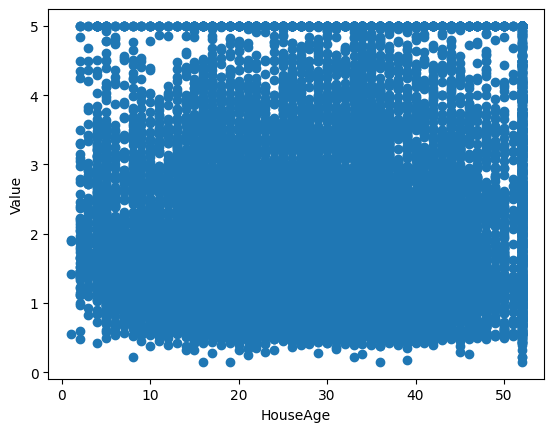

In [10]:
plt.scatter(x=data['HouseAge'],y=data['Value'])
plt.xlabel('HouseAge')
plt.ylabel('Value')

/tmp/ipykernel_8806/1299143049.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Value'],fit=norm)


<AxesSubplot:xlabel='Value', ylabel='Density'>

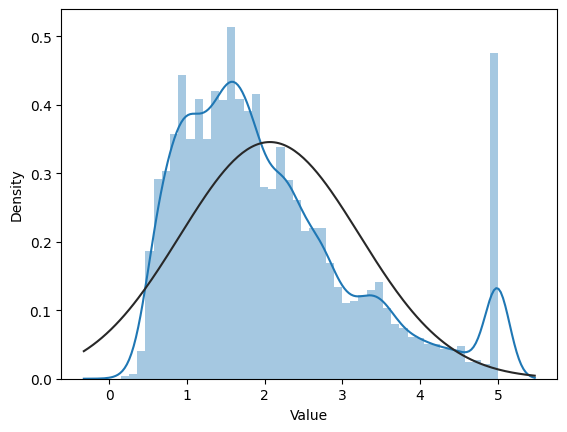

In [11]:
from scipy.stats import norm, probplot
(mu,sigma) = norm.fit(data['Value'])
sns.distplot(data['Value'],fit=norm)

((array([-3.98611384, -3.7703327 , -3.65227474, ...,  3.65227474,
          3.7703327 ,  3.98611384]),
  array([0.14999, 0.14999, 0.14999, ..., 5.00001, 5.00001, 5.00001])),
 (1.1024323228096717, 2.0685581690891475, 0.9551960798030749))

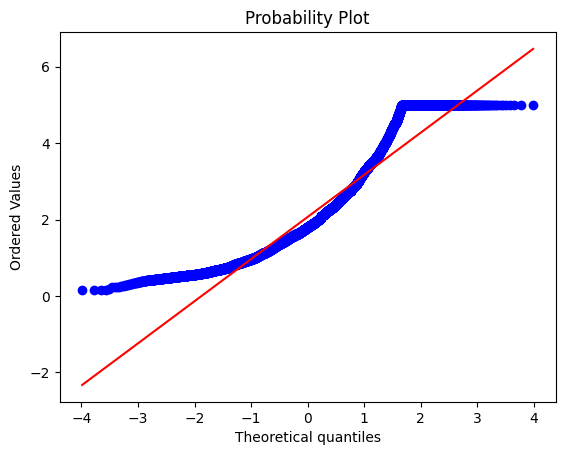

In [12]:
probplot(data['Value'],plot=plt)

#### Data Correlation

<AxesSubplot:>

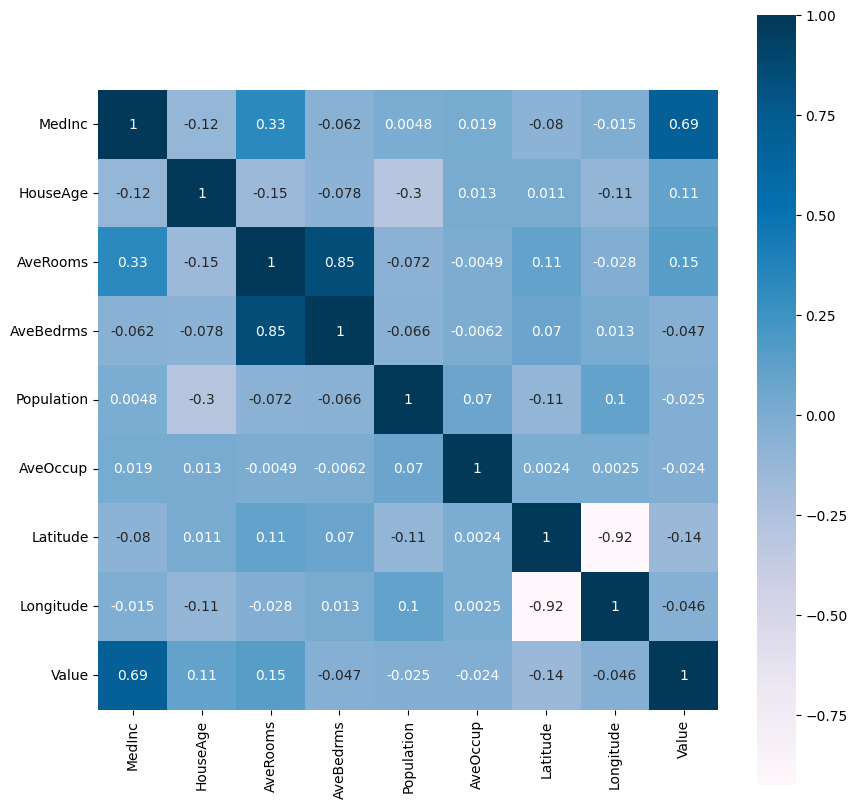

In [13]:
plt.figure(figsize=(10,10))
crr = data.corr()
sns.heatmap(crr,annot=True,square=True,cmap=plt.cm.PuBu)

#### Modelling

In [20]:
from sklearn.model_selection import train_test_split
# X = data.drop('Value',axis=1)
# Y = data['Value']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,train_size=0.8,shuffle=False)

(4128,)

In [15]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train,Y_train)
Y_pred = reg.predict(X_test)

Text(0, 0.5, 'Predicted Values')

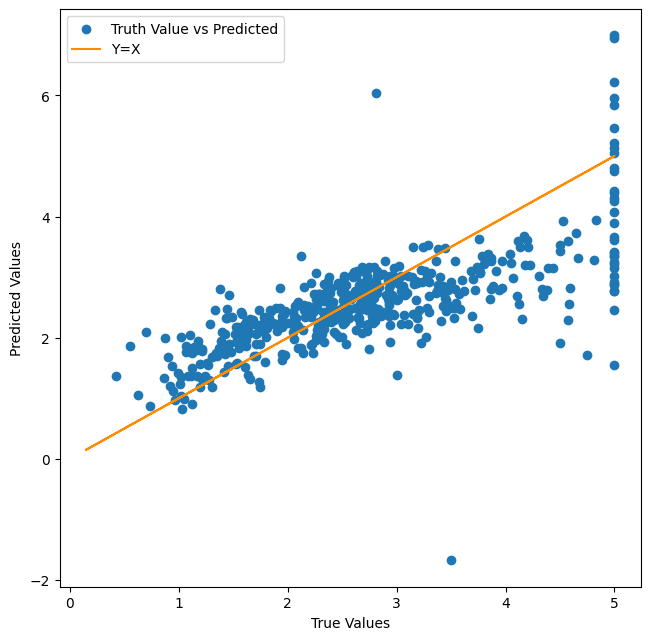

In [35]:
# plt.scatter(x=Y_pred,y=Y_test,)
plt.figure(figsize=(7.5,7.5))
plt.scatter(Y_test[:500],Y_pred[:500])
plt.plot(Y_test,Y_test, color='darkorange')
plt.legend(['Truth Value vs Predicted','Y=X'])
plt.xlabel('True Values')
plt.ylabel('Predicted Values')

In [17]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_test,Y_pred)
mse

0.494684835638795